In [3]:
%pylab inline --no-import-all
import numpy as np
import seaborn as sns; sns.set()
from scipy.ndimage.measurements import label
import tqdm

def iswin(board):
    board, _ = label(board)
    bottom = board[0][board[0] > 0]
    top = board[-1][board[-1] > 0]
    return np.in1d(bottom, top).any()

def run(p, n):
    board = np.random.random((n, n)) < p
    return iswin(board)

def prob(p, n, nreal=10000):
    runs = []
    for _ in tqdm.trange(nreal):
        runs.append(run(p, n))
    return np.mean(runs)

Populating the interactive namespace from numpy and matplotlib


/home/heitor/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
prob(0.5, 1000, 1000)

0.0

In [6]:
x = np.arange(1, 11)
fair = np.array([prob(0.5, i) for i in x])
bias = np.array([prob(0.7, i) for i in x])

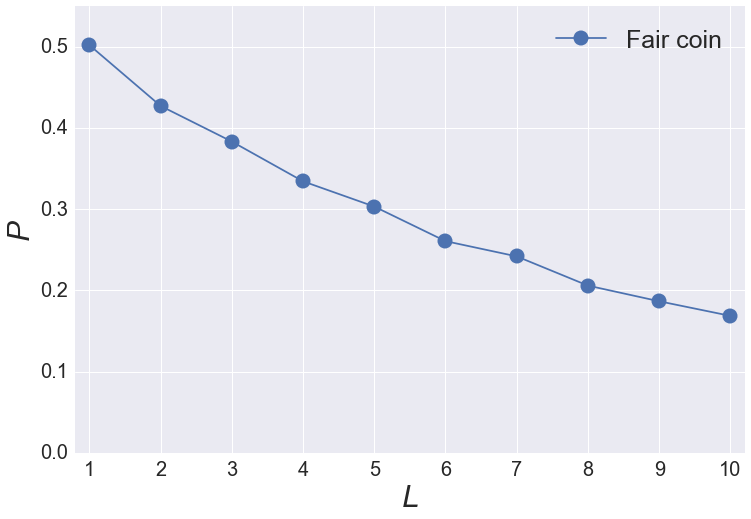

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fair, 'o-', ms=15, label='Fair coin')
ax.set_xlim(0.8, 10.2)
ax.set_ylim(0.0)
ax.set_xticks(x)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("L", fontsize=30, style='italic')
ax.set_ylabel("P", fontsize=30, style='italic')
ax.legend(loc='best', fontsize=25)

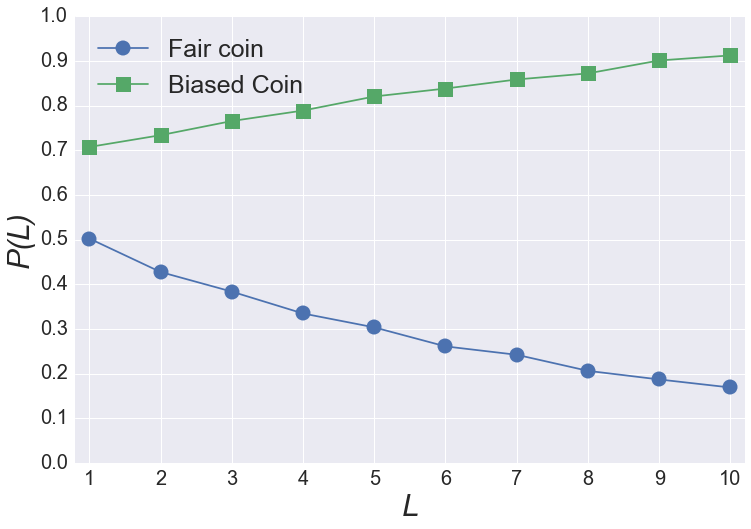

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, fair, 'o-', ms=15, label='Fair coin')
ax.plot(x, bias, 's-', ms=15, label='Biased Coin')
ax.set_xlim(0.8, 10.2)
ax.set_ylim(0.0)
ax.set_xticks(x)
ax.set_yticks(np.linspace(0.0,1.0,11))
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("L", fontsize=30, style='italic')
ax.set_ylabel("P(L)", fontsize=30, style='italic')
ax.legend(loc='best', fontsize=25)

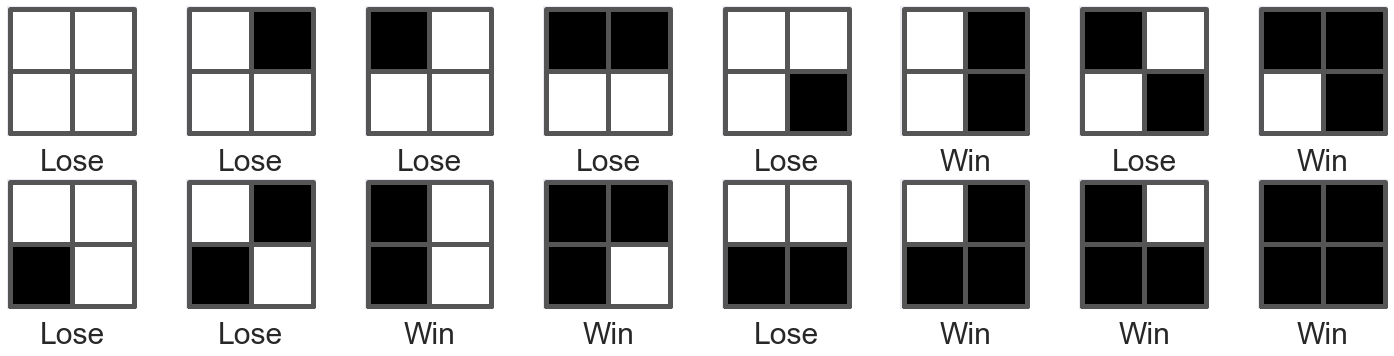

In [9]:
from itertools import product
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(10*2,10/2))
axes = axes.ravel()
grid = np.array([[0,0],[0,2],[2,2],[2,0],[0,0],
                 [0,1],[2,1],[2,0],[1,0],[1,2]]).T
for i, ax in zip(product([0, 1], repeat=4), axes):
    i = np.array(i).reshape(2,2)
    ax.plot(*grid, lw=5, c='#555555')
    ax.pcolormesh(i, vmin=0, vmax=1)
    ax.set_xlim(-0.05,2.05)
    ax.set_ylim(ax.get_xlim())
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xlabel('Win' if iswin(i) else 'Lose', fontsize=30)
    ax.set_aspect('equal')
fig.tight_layout()

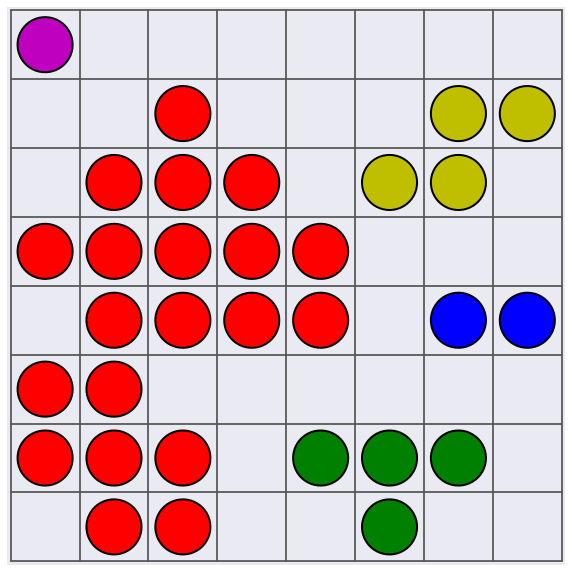

In [100]:
def plt_circ(x, y, r, seg=50, ax=None, **kwargs):
    ax = ax or plt.gca()
    t = np.linspace(0.0, 2 * np.pi, seg)
    xx = x + r * np.cos(t)
    yy = y + r * np.sin(t)
    ax.fill(xx, yy, **kwargs)
    
def plt_grid(x0, y0, w, h, nx, ny, ax=None, **kwargs):
    ax = ax or plt.gca()
    xx = np.linspace(x0, x0+w, nx+1)
    yy = np.linspace(y0, y0+h, ny+1)
    for x in xx:
        ax.plot([x,  x], [y0, y0+h], **kwargs)
    for y in yy:
        ax.plot([x0,  x0+w], [y, y], **kwargs)
    

def plot1(ax, color=False):
    np.random.seed(123)
    grid = np.random.random((8, 8)) < 0.5
    if not color:
        for j, i in zip(*np.where(grid)):
            plt_circ(i+0.5, j + 0.5, 0.4, lw=2, facecolor='#555555')
    else:
        lab, _ = label(grid)
        colors = {1: 'r', 2: 'g', 3:'b', 4:'y', 5:'m', 6:'c', 7:'orange', 8:'w'}
        for j, i in zip(*np.where(grid)):
            plt_circ(i+0.5, j + 0.5, 0.4, lw=2, facecolor=colors[lab[j, i]])
    ax.set_xlim(-0.05, 8.05)
    ax.set_ylim(-0.05, 8.05)
    ax.set_aspect('equal')
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid('off')
    plt_grid(0, 0, 8, 8, 8, 8, c='#555555')

plt.close(fig)
fig, ax = plt.subplots(figsize=(10, 10))
plot1(ax, True)